Project 3: Predicting Aircraft Damages

Data Cleaning & EDA

This notebook contains data cleaning and visualizations before modeling.
1. Data Cleaning 
2. Exploratory Data Analysis & Visualizations
3. Preprocessing

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [448]:
pd.set_option('display.max_columns', None)

In [449]:
# read csv
df = pd.read_csv('../../Data/airplanes.csv')
df.head(1)

/opt/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,0.0,1,Reciprocating,Part 91: General Aviation,,Instructional,,,,2,VMC,LANDING,02/28/2008


In [450]:
df['investigation_type'].value_counts()

              85996
 Accident     59482
 Incident      1873
Name: investigation_type, dtype: int64

In [451]:
df['country'].value_counts()

 United States     147351
Name: country, dtype: int64

In [452]:
location = df['location'].value_counts(ascending = False)[:10]

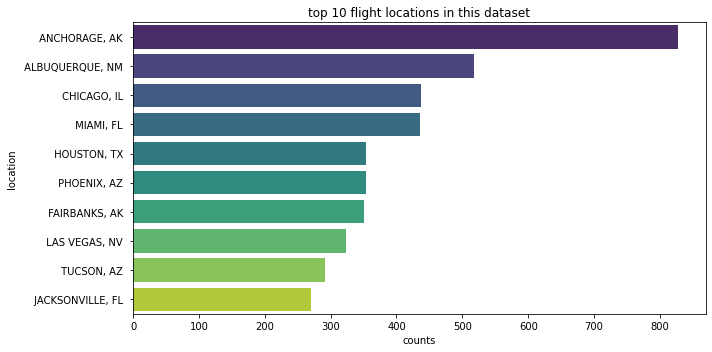

In [453]:
plt.figure(figsize = (10, 5))
sns.barplot(x = location, y = location.index, orient = 'h', palette = 'viridis')
plt.title('top 10 flight locations in this dataset')
plt.xlabel('counts')
plt.ylabel('location')
plt.tight_layout()

In [454]:
df['aircraft_category'].value_counts()

                  140007
 Airplane           6389
 Helicopter          695
 Glider              141
 Balloon              70
 Gyrocraft            36
 Ultralight            7
 Blimp                 3
 Powered-Lift          2
 Unknown               1
Name: aircraft_category, dtype: int64

In [455]:
# set display options
# aircraft_damage summary statistics
pd.options.display.max_rows = 4000
df.groupby('aircraft_damage').describe().transpose()

aircraft_damage                      Destroyed        Minor    Substantial 
amateur_built count  87398.000000  14669.000000  1674.000000   43589.000000
              mean       0.020561      0.124208     0.023297       0.084540
              std        0.141910      0.329829     0.150892       0.278199
              min        0.000000      0.000000     0.000000       0.000000
              25%        0.000000      0.000000     0.000000       0.000000
              50%        0.000000      0.000000     0.000000       0.000000
              75%        0.000000      0.000000     0.000000       0.000000
              max        1.000000      1.000000     1.000000       1.000000

In [456]:
# columns and rows
print('Train set` size:', df.shape)

Train set` size: (147351, 27)


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147351 entries, 0 to 147350
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_id                147351 non-null  object 
 1   investigation_type      147351 non-null  object 
 2   accident_number         147351 non-null  object 
 3   event_date              147351 non-null  object 
 4   location                147351 non-null  object 
 5   country                 147351 non-null  object 
 6   airport_code            147351 non-null  object 
 7   airport_name            147351 non-null  object 
 8   injury_severity         147351 non-null  object 
 9   aircraft_damage         147351 non-null  object 
 10  aircraft_category       147351 non-null  object 
 11  registration_number     147351 non-null  object 
 12  make                    147351 non-null  object 
 13  model                   147351 non-null  object 
 14  amateur_built       

In [458]:
df.isnull().sum()

event_id                   0
investigation_type         0
accident_number            0
event_date                 0
location                   0
country                    0
airport_code               0
airport_name               0
injury_severity            0
aircraft_damage            0
aircraft_category          0
registration_number        0
make                       0
model                      0
amateur_built             21
number_of_engines          0
engine_type                0
far_description            0
schedule                   0
purpose_of_flight          0
total_fatal_injuries       0
total_serious_injuries     0
total_minor_injuries       0
total_uninjured            0
weather_condition          0
broad_phase_of_flight      0
publication_date           0
dtype: int64

In [459]:
# drop nan
df.dropna(inplace = True)

In [460]:
df.weather_condition.describe()

count     147330
unique         4
top             
freq       86050
Name: weather_condition, dtype: object

In [461]:
df.event_date.describe()

count           147330
unique           16086
top        07/10/1966 
freq                41
Name: event_date, dtype: object

In [462]:
df.purpose_of_flight.describe()

count     147330
unique        23
top             
freq       87080
Name: purpose_of_flight, dtype: object

In [463]:
df['aircraft_damage'].value_counts()

                 87398
 Substantial     43589
 Destroyed       14669
 Minor            1674
Name: aircraft_damage, dtype: int64

In [464]:
# df contains only labeled rows for aircraft_damage bc I cannot interpret something unless I know what it refers.
df = df[df['aircraft_damage']!='  ']

In [465]:
# get rid of spaces in dataframe
clean_df = df.drop(columns = 'amateur_built').apply(lambda x: x.str.strip())

In [466]:
# insert numerical column back in
clean_df.insert(value = df['amateur_built'], column = 'amateur', loc = 0)
clean_df.head(1)

,amateur,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date
0,0.0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,1,Reciprocating,Part 91: General Aviation,,Instructional,,,,2,VMC,LANDING,02/28/2008


In [467]:
# There are ~ 10 different phases of flights. I only want to focus on top 5 
clean_df['broad_phase_of_flight'].value_counts()

LANDING        15124
TAKEOFF        12261
CRUISE          9772
MANEUVERING     8058
APPROACH        6390
CLIMB           1891
TAXI            1846
DESCENT         1703
GO-AROUND       1343
STANDING         741
UNKNOWN          501
                 191
OTHER            111
Name: broad_phase_of_flight, dtype: int64

In [468]:
# convert datetime
import datetime
clean_df['event_date'] = pd.to_datetime(clean_df['event_date'])

In [469]:
# create month
clean_df['event_month'] = clean_df['event_date'].dt.month
clean_df['event_month']

0         12
1         12
2         12
3         12
4         12
          ..
70852      8
80553      6
92554      8
147305     7
147344    10
Name: event_month, Length: 59932, dtype: int64

array([[<AxesSubplot:title={'center':'event_month'}>]], dtype=object)

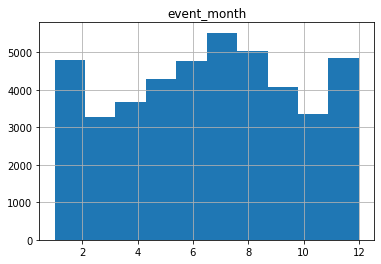

In [470]:
# see aircraft damage distribution; histogram peaks at July
clean_df.loc[clean_df['aircraft_damage'] == 'Substantial',['event_month']].hist()

array([[<AxesSubplot:title={'center':'event_month'}>]], dtype=object)

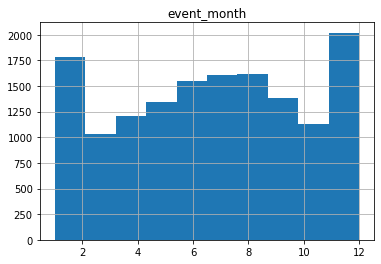

In [471]:
# see aircraft damage distribution; the histogram peaks around nov-dec
clean_df.loc[clean_df['aircraft_damage'] == 'Destroyed',['event_month']].hist()

array([[<AxesSubplot:title={'center':'event_month'}>]], dtype=object)

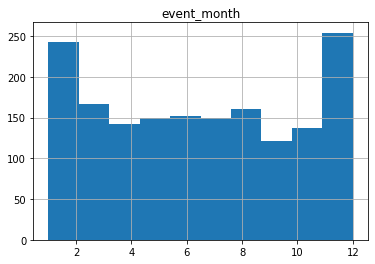

In [472]:
# see aircraft damage distribution; the histogram peaks around nov-dec
clean_df.loc[clean_df['aircraft_damage'] == 'Minor',['event_month']].hist()

array([[<AxesSubplot:title={'center':'amateur'}>]], dtype=object)

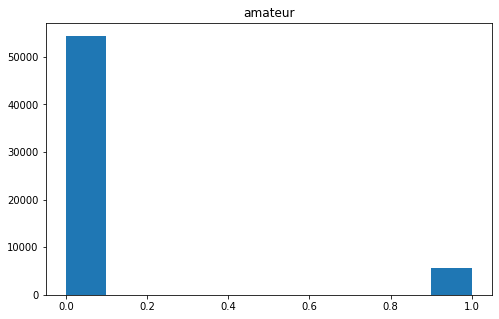

In [473]:
# only a small number of flight attendants are ameteurb
clean_df.hist('amateur', figsize = (8, 5), grid = False)

In [474]:
# only want to look for rows that are not ' '
# our group eda indicated that most null values happened before < ~ 1980, so idk if that's because 1) no accident, or 2) lack of reporting
# linear regression
filtered = clean_df[clean_df['total_serious_injuries']!='']
filtered = filtered[filtered['total_fatal_injuries']!='']
filtered = filtered[filtered['total_minor_injuries']!='']
filtered = filtered[filtered['total_uninjured']!='']

filtered.dropna(inplace=True)

filtered['total_serious_injuries'] = filtered['total_serious_injuries'].astype(int)
filtered['total_fatal_injuries'] = filtered['total_fatal_injuries'].astype(int)
filtered['total_minor_injuries'] = filtered['total_minor_injuries'].astype(int)
filtered['total_uninjured'] = filtered['total_uninjured'].astype(int)

# decision tree
filtered = filtered[filtered['weather_condition']!='']

# decision tree
filtered = filtered[filtered['broad_phase_of_flight']!='']


filtered = filtered.replace(['Minor', 'Substantial', 'Destroyed'], value = [0, 1, 2])
filtered = filtered.replace(['VMC', 'IMC', 'UNK'], value = [0, 1, 2])


filtered.shape,clean_df.shape
sum(filtered['aircraft_damage']==2),sum(filtered['aircraft_damage']==0),sum(filtered['aircraft_damage']==1),filtered.shape

(12384, 1330, 33251, (46965, 28))

In [475]:
# accident and damaged 
accident = ((clean_df['investigation_type'] == 'Accident') & (filtered['aircraft_damage'] == 2)).sum()
accident

12381

In [476]:
# incident and damaged
incident = ((clean_df['investigation_type'] == 'Incident') & (filtered['aircraft_damage'] == 2)).sum()
incident
# the difference between incident and accident is not very clear

3

<AxesSubplot:>

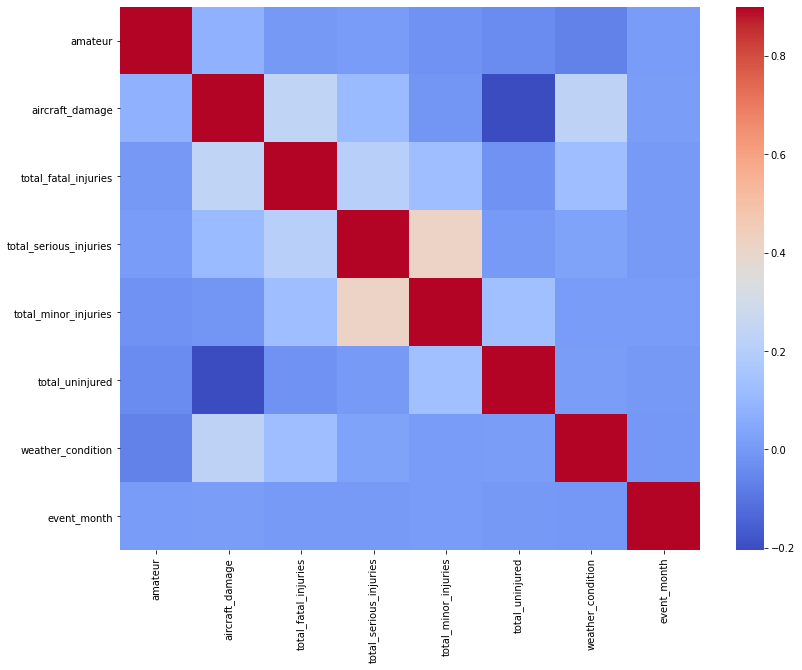

In [477]:
# from the color disturtion, most variables do not have strong correlations
corr= filtered.corr()
plt.subplots(figsize = (13, 10))
sns.heatmap(corr, vmax = 0.9, cmap = 'coolwarm')

Moderate correlations could be observed among: 
1. total_fatal_injuries, total_minor_injuries, total_uninjuries, event_month

In [478]:
# the top 10 common flight make is the same type
make = filtered.make.value_counts(ascending = False)[:10]
make

CESSNA      13338
PIPER        7213
Cessna       3322
BEECH        2310
Piper        1760
BELL         1017
GRUMMAN       831
Beech         799
MOONEY        592
BELLANCA      580
Name: make, dtype: int64

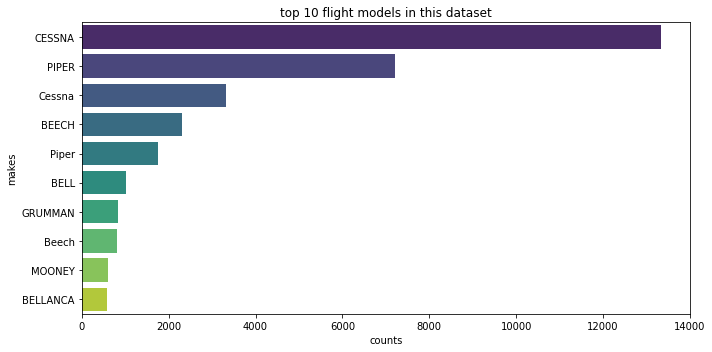

In [479]:
# graph horizontal bar chart to visualize this part
plt.figure(figsize = (10, 5))
sns.barplot(x = make, y = make.index, orient = 'h', palette = 'viridis')
plt.title('top 10 flight models in this dataset')
plt.xlabel('counts')
plt.ylabel('makes')
plt.tight_layout()

In [480]:
# sum of cessna and aircraft_damage
((filtered['make'] == 'CESSNA') & (filtered['aircraft_damage'] == 2)).sum()

3094

In [481]:
make.index.tolist()

['CESSNA',
 'PIPER',
 'Cessna',
 'BEECH',
 'Piper',
 'BELL',
 'GRUMMAN',
 'Beech',
 'MOONEY',
 'BELLANCA']

<AxesSubplot:ylabel='make'>

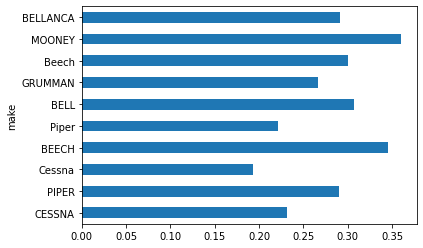

In [482]:
# flight make and aircraft damage
# filtered.groupby(['make'])
top_carriers = filtered.make.value_counts(ascending = False)[:10].index.tolist()
(filtered['aircraft_damage'] == 2).groupby(filtered['make']).mean().sort_values(ascending = False)[top_carriers].plot(kind = 'barh')
# make a dataframe and .plot

<AxesSubplot:ylabel='make'>

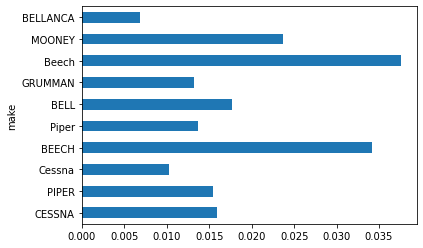

In [483]:
# aircraft and minor damage
top_carriers = filtered.make.value_counts(ascending = False)[:10].index.tolist()
(filtered['aircraft_damage'] == 0).groupby(filtered['make']).mean().sort_values(ascending = False)[top_carriers].plot(kind = 'barh')

<AxesSubplot:ylabel='make'>

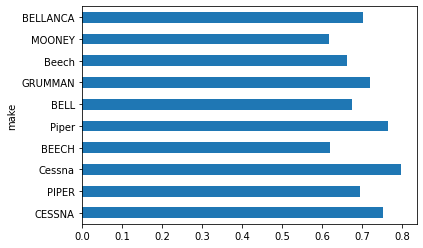

In [484]:
# substantially destroyed
top_carriers = filtered.make.value_counts(ascending = False)[:10].index.tolist()
(filtered['aircraft_damage'] == 1).groupby(filtered['make']).mean().sort_values(ascending = False)[top_carriers].plot(kind = 'barh')

In [485]:
category = clean_df.aircraft_category.value_counts(ascending = False)[:5]
category

              52709
Airplane       6298
Helicopter      691
Glider          141
Balloon          44
Name: aircraft_category, dtype: int64

<AxesSubplot:ylabel='aircraft_category'>

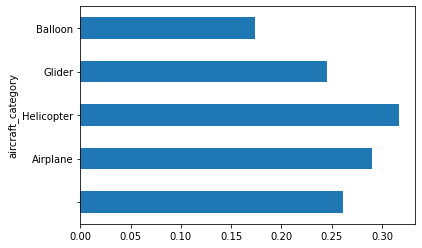

In [486]:
# flight category and damaged percentage
top_category = clean_df.aircraft_category.value_counts(ascending = False)[:5].index.tolist()
(filtered['aircraft_damage'] == 2).groupby(clean_df['aircraft_category']).mean().sort_values(ascending = False)[top_category].plot(kind = 'barh')

<AxesSubplot:ylabel='engine_type'>

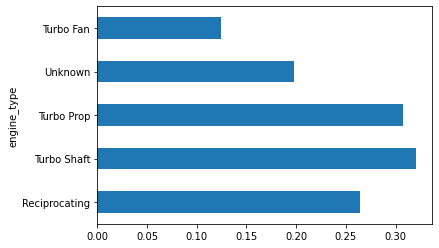

In [487]:
# engine type and damaged 
top_engine = clean_df.engine_type.value_counts(ascending = False)[:5].index.tolist()
(filtered['aircraft_damage'] == 2).groupby(clean_df['engine_type']).mean().sort_values(ascending = False)[top_engine].plot(kind = 'barh')

In [488]:
# many reasons why these flights were flying, only want to list the top 5
flight_purpose = filtered.purpose_of_flight.value_counts(ascending = False)[:5]
flight_purpose

Personal              27372
Instructional          5876
Unknown                4835
Aerial Application     3044
Business               2856
Name: purpose_of_flight, dtype: int64

In [489]:
flight_purpose.index.tolist()

['Personal', 'Instructional', 'Unknown', 'Aerial Application', 'Business']

<AxesSubplot:ylabel='purpose_of_flight'>

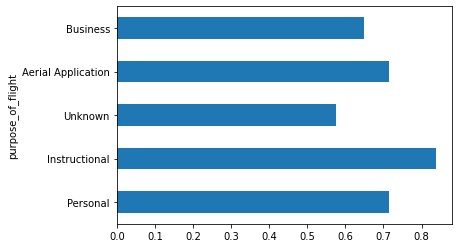

In [490]:
# flight reasons and damage
top_purpose = filtered.purpose_of_flight.value_counts(ascending = False)[:5].index.tolist()
(filtered['aircraft_damage'] == 1).groupby(filtered['purpose_of_flight']).mean().sort_values(ascending = False)[top_purpose].plot(kind = 'barh')

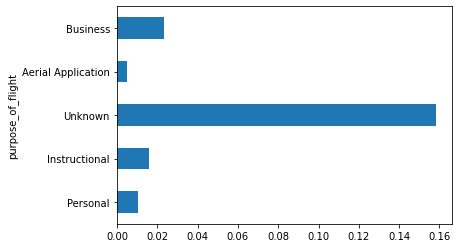

In [491]:
# minor and flight reason
top_purpose = filtered.purpose_of_flight.value_counts(ascending = False)[:5].index.tolist()
(filtered['aircraft_damage'] == 0).groupby(filtered['purpose_of_flight']).mean().sort_values(ascending = False)[top_purpose].plot(kind = 'barh')
plt.savefig("_reasons_aircraft_damages_happened.png", bbox_inches = "tight");

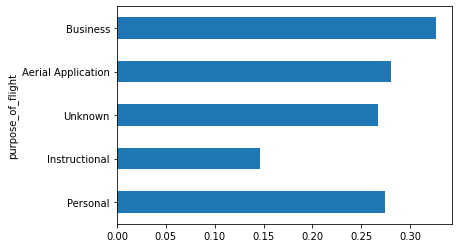

In [492]:
# substantial and flight reason
top_purpose = filtered.purpose_of_flight.value_counts(ascending = False)[:5].index.tolist()
(filtered['aircraft_damage'] == 2).groupby(filtered['purpose_of_flight']).mean().sort_values(ascending = False)[top_purpose].plot(kind = 'barh')
plt.savefig("top_5_reasons_aircraft_damages_happened.png", bbox_inches = "tight");



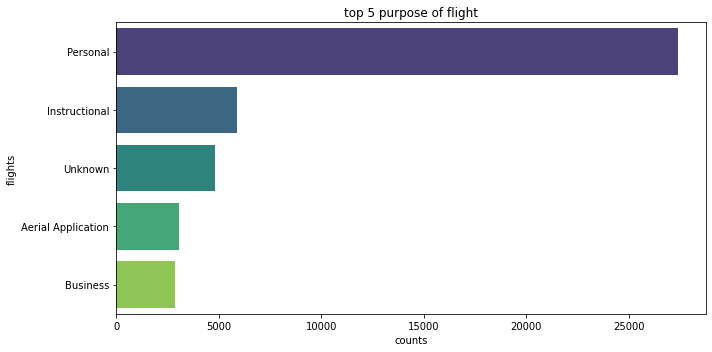

In [493]:
# graph horizontal bar chart to visualize this part
plt.figure(figsize = (10, 5))
sns.barplot(x = flight_purpose, y = flight_purpose.index, orient = 'h', palette = 'viridis')
plt.title('top 5 purpose of flight')
plt.xlabel('counts')
plt.ylabel('flights')
plt.tight_layout()

Text(0, 0.5, 'Destroy Level')

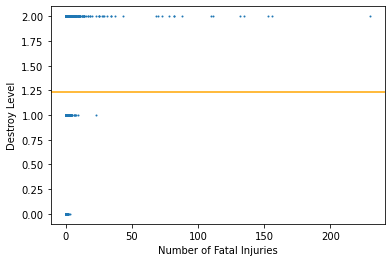

In [494]:
# majority of the aircrafts is between 1 (substantial) & 2 (destroyed)
plt.scatter(filtered['total_fatal_injuries'], filtered['aircraft_damage'], s = 1)
plt.axhline(filtered['aircraft_damage'].mean(), color = 'orange')
plt.xlabel('Number of Fatal Injuries')
plt.ylabel('Destroy Level')

In [495]:
# save the data
filtered.to_csv('out.csv', index=False)